In [1]:
"""
Notebook utilizado para apresentar uma introdução à teoria da amostragem de sinais.
Criado para a disciplina Geofísica I da Universidade Federal de Uberlândia.

Protegido por licença GPL v3.0. O uso e a reprodução são livres para fins educacionais
desde que citada a fonte.

Prof. Dr. Emerson Rodrigo Almeida
emerson.almeida@ufu.br

Última modificação: 02/02/2021
"""

'\nNotebook utilizado para apresentar uma introdução à teoria da amostragem de sinais.\nCriado para a disciplina Geofísica I da Universidade Federal de Uberlândia.\n\nProtegido por licença GPL v3.0. O uso e a reprodução são livres para fins educacionais\ndesde que citada a fonte.\n\nProf. Dr. Emerson Rodrigo Almeida\nemerson.almeida@ufu.br\n\nÚltima modificação: 02/02/2021\n'

# Instruções iniciais

Neste notebook você irá aprender como funciona a filtragem de frequências indesejadas em sinais. Para isto leia atentamente as instruções apresentadas antes de cada célula e execute-as uma a uma, para acompanhar o processo corretamente.

Não se preocupe em compreender o código em si, não é obrigatório que você conheça a programação para obter e interpretar os resultados da demonstração. Mesmo assim, sinta-se livre caso queira perguntar qualquer coisa para aprender mais sobre o código e sua elaboração.

### Passo 01 - Preparação

Primeiramente vamos preparar o notebook com os módulos e funções que precisaremos no decorrer da demonstração. A célula abaixo contém as funções utilizadas nos cálculos e as funções utilizadas para gerar as figuras. Execute-a uma vez antes de executar qualquer outra parte do código e **não altere nada no código apresentado na célula**. Você pode executar o código na célula clicando no botão RUN na barra do Jupyter Notebook ou pressionando as teclas SHIFT+ENTER no seu teclado.

In [2]:
from scipy.fftpack import fft, fftfreq, ifft
from scipy.interpolate import interp1d
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


# o que estiver ok vem pra cá

def gera_sinal(a, f, t_max):
    """
    Gera uma função obtida a partir de uma sobreposição de funções seno, onde cada uma delas é caracterizada por
    uma amplitude A e frequência f na forma s(t) = A * cos(2 * pi * f * t). A sobreposição destas funções será o sinal
    analógico de referência. Esta função pode ser amostrada em qualquer instante de tempo que se queira, de forma 
    que esta é a melhor forma de representar um sinal contínuo para os objetivos desta demonstração.
    """
    
    dt = t_max/1000
    tt = np.arange(0, t_max + dt, dt)                        # eixo de tempo estendido
    
    s = np.zeros(np.shape(tt))
    
    for i in range(len(a)):
        s = s + (a[i] * np.sin(2 * np.pi * f[i] * tt))
        
    return s, tt      # função que caracteriza o sinal analógico



def calcula_espectro(tt, ss):
    
    dt = tt[1] - tt[0]
    n_amostras = len(ss)

    espectro = fft(ss, axis=0)
    ff = fftfreq(len(ss), dt)
    
    
    print(ff)
    
    
    return ff, espectro





def insere_ruido():
    pass

def gera_passa_baixa(ff, f_c):
    
    # f_c é a frequência de corte definida pelo usuário, até onde a amplitude do filtro é 1
    
    df = ff[1] - ff[0]
    amp_caixa = [1, 1, 0, 0]
    f_rampa = f_c + 2*df        # frequência onde o filtro atinge amplitude zero
    
    # parte positiva do espectro
    
    f_caixa = [0, f_c, f_c+2*df, ff[-1]]
    filtro = interp1d(f_caixa, amp_caixa, kind='linear')
    
    print(ff)
    print(f_caixa)
    
    
    
    return filtro(ff)
    
    
    

def passa_alta():
    pass

def passa_banda():
    pass

def rejeita_banda():
    pass


# funções das figuras
def plota_sinal(tt, ss):
    """
    Plota o sinal calculado pela sobreposição das funções seno.
    """
    
    fig, ax = plt.subplots(figsize=(15,3))
    ax.plot(tt, ss)
    ax.set_xlabel("Tempo (s)", fontsize=14)
    ax.set_ylabel("Amplitude (ua)", fontsize=14)
    ax.set_title("Figura 1. Representação do sinal original", fontsize=14)
    ax.set_xlim([tt[0], tt[-1]])
    ax.grid()

    
def plota_espectro(ff, espec):
    n_samples = len(espec)       # vai ser o mesmo número de amostras do sinal porque a fft não usou zeros adicionais

    nf_positivas = round(n_samples / 2) + 1     # número de frequências positivas
    amplitudes = (2 / n_samples) * np.abs(espec[:nf_positivas])
    frequencias = ff[:nf_positivas]
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.stem(frequencias, amplitudes)
    ax.set_xlabel('Frequência (Hz)', fontsize=14)
    ax.set_ylabel('Amplitude (ua)', fontsize=14)
    ax.set_xlim([0, frequencias[-1]])
    ax.set_title("Figura 2. Espectro de amplitudes do sinal original", fontsize=14)
    ax.grid()
    

In [3]:
a1 = 1.00      # amplitude da componente s_1(t) em unidades de amplitude
f1 = 1.00      # frequência da componente s_1(t) em Hertz

a2 = 0.50      # amplitude da componente s_2(t) em unidades de amplitude
f2 = 3.00      # frequência da componente s_2(t) em Hertz

a3 = 1.50      # amplitude da componente s_3(t) em unidades de amplitude
f3 = 15.0      # frequência da componente s_3(t) em Hertz

a4 = 2.75      # amplitude da componente s_4(t) em unidades de amplitude
f4 = 0.50      # frequência da componente s_4(t) em Hertz

a5 = 0.80      # amplitude da componente s_5(t) em unidades de amplitude
f5 = 7.00      # frequência da componente s_5(t) em Hertz

janela_tempo = 10.0              # janela temporal em segundos

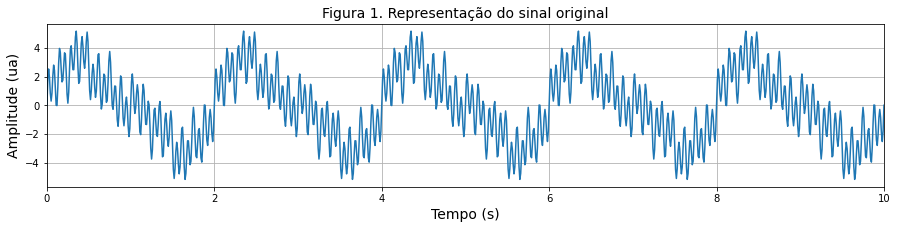

In [4]:
sinal, tempo = gera_sinal([a1, a2, a3, a4, a5], [f1, f2, f3, f4, f5], janela_tempo)
plota_sinal(tempo, sinal)

[ 0.         0.0999001  0.1998002 ... -0.2997003 -0.1998002 -0.0999001]


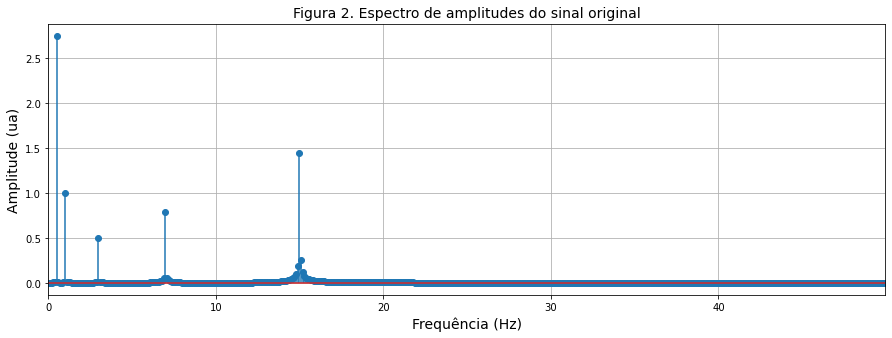

In [5]:
frequencias, amplitude_f = calcula_espectro(tempo, sinal)
plota_espectro(frequencias, amplitude_f)

In [8]:
f_c = 10.0
tipo = 'passa baixa'

In [9]:


if tipo=='passa-baixa':
    pass
    
elif tipo=='passa-alta':
    pass
        
elif tipo=='passa-banda':
    pass
        
elif tipo=='rejeita-banda':
    pass
                


df = frequencias[1] - frequencias[0]
i_max_freq = np.abs(frequencias-np.max(frequencias)).argmin()   # indice da máxima frequência positiva
f_rampa = f_c + 5*df        # frequência da rampa do filtro do fim da rampa do filtro
amp_caixa = [1, 1, 0, 0]    # amplitudes da caixa do filtro na parte positiva do espectro

# parte positiva do espectro
f_caixa_pos = np.array([frequencias[0], f_c, f_rampa, np.max(frequencias)])
caixa_pos = interp1d(f_caixa_pos, amp_caixa, kind='linear')

# parte negativa do espectro
f_caixa_neg = np.flip(-1 * f_caixa_pos)
f_caixa_neg[-1] = frequencias[-1]
caixa_neg = interp1d(f_caixa_neg, np.flip(amp_caixa), kind='linear')

filtro = np.concatenate([caixa_pos(frequencias[:i_max_freq+1]), caixa_neg(frequencias[i_max_freq+1:])], axis=0)






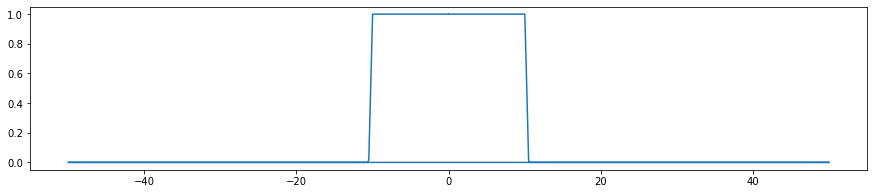

In [10]:
plt.figure(figsize=(15,3))

plt.plot(frequencias, filtro)